# DS-SF-30 | Codealong 11: Logistic Regression

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## `Iris` dataset, Take 2

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-11-iris.csv'))

In [3]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


### Feature matrix and label vector

In [4]:
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]

In [5]:
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
c = df.Species

In [7]:
c

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: Species, dtype: object

## Activity | Create a one-hot encoding/binary variables for the outcome variable

In [18]:
cs = pd.get_dummies(c)

## Activity | Run logistic regression to learn whether or not an iris plant is a `Setosa`

- (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [19]:
model_Setosa = linear_model.LogisticRegression().fit(X,cs.Setosa)

> ## What's the accuracy of your model?

In [20]:
model_Setosa.score(X,y.Setosa)

1.0

> ## Log odds plot (that each plant in the dataset is a `Setosa`)

In [21]:
logit_hat_Setosa = model_Setosa.intercept_ + \
    (X * model_Setosa.coef_[0]).sum(axis = 1)

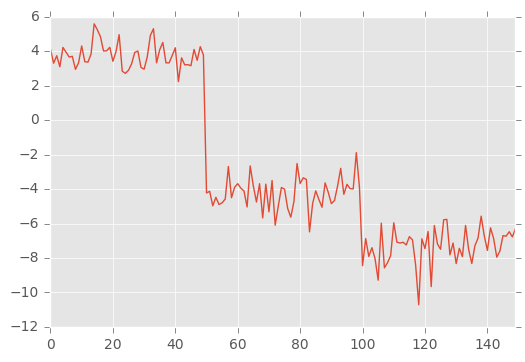

In [22]:
# First 60 points are Setosa, next 50 and 50 are versicolor and virginica respectively
logit_hat_Setosa.plot()

> ## Using just the log odds, let's confirm the model accuracy

In [23]:
((logit_hat_Setosa >= 0) == (cs.Setosa == 1)).sum()

150

In [24]:
((logit_hat_Setosa >= 0) == (cs.Setosa == 1)).mean()

1.0

> ## Odds plot (that each plant in the dataset is a `Setosa`)

In [25]:
odds_hat_Setosa = np.exp(logit_hat_Setosa)

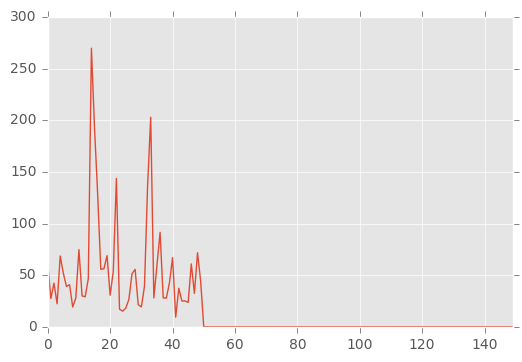

In [26]:
odds_hat_Setosa.plot()

> ## Now, using just the odds, let's confirm the model accuracy

In [27]:
((odds_hat_Setosa >= 1) == (cs.Setosa == 1)).sum()

150

In [28]:
((odds_hat_Setosa >= 1) == (cs.Setosa == 1)).mean()

1.0

> ## Log class probabilities (that each plant in the dataset is a `Setosa`)

In [29]:
p_hat_Setosa = odds_hat_Setosa / (1 + odds_hat_Setosa)

In [30]:
p_hat_Setosa

0      0.984074
1      0.964775
2      0.976924
3      0.957121
4      0.985634
         ...   
145    0.001229
146    0.001190
147    0.001540
148    0.001140
149    0.001849
dtype: float64

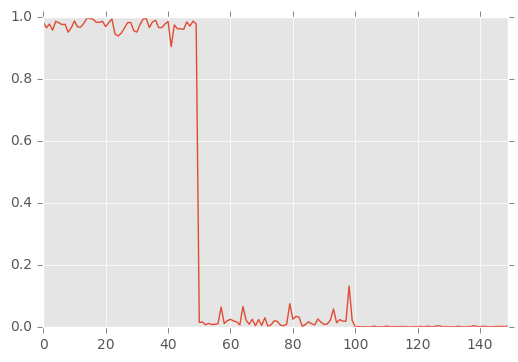

In [31]:
p_hat_Setosa.plot()

> ## Using the class probabilities, let's confirm for the last time the model accuracy

In [32]:
((p_hat_Setosa >= .5) == (cs.Setosa == 1)).sum()

150

In [33]:
((p_hat_Setosa >= .5) == (cs.Setosa == 1)).mean()

1.0

In [34]:
p_hat_Setosa

0      0.984074
1      0.964775
2      0.976924
3      0.957121
4      0.985634
         ...   
145    0.001229
146    0.001190
147    0.001540
148    0.001140
149    0.001849
dtype: float64

> ## Finally, let's compute the outcome class for the `Setosa` model and verify the model accuracy

In [35]:
c_hat_Setosa = p_hat_Setosa.round()

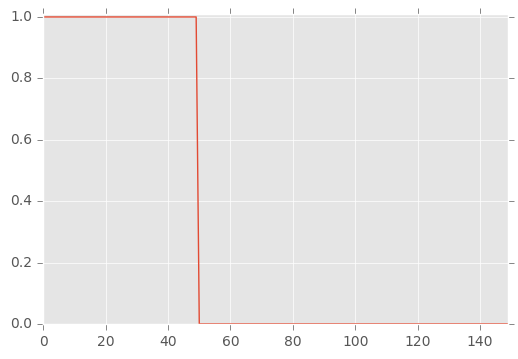

In [36]:
c_hat_Setosa.plot(ylim = (0, 1.01))

In [37]:
(c_hat_Setosa == cs.Setosa).sum()

150

In [38]:
(c_hat_Setosa == cs.Setosa).mean()

1.0

In [39]:
pd.crosstab(c_hat_Setosa,
    cs.Setosa,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0.0,1.0
Hypothesized Class,,
0.0,100,0
1.0,0,50


## Versicolor

In [40]:
model_Versicolor = linear_model.LogisticRegression().\
    fit(X, cs.Versicolor)

In [41]:
model_Versicolor.score(X, cs.Versicolor)

0.69999999999999996

In [42]:
logit_hat_Versicolor = model_Versicolor.intercept_ + \
    (X * model_Versicolor.coef_[0]).sum(axis = 1)

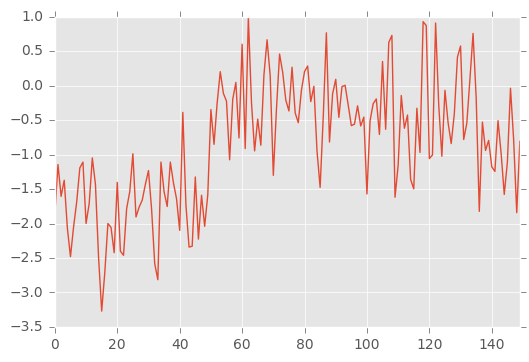

In [43]:
logit_hat_Versicolor.plot()

In [44]:
((logit_hat_Versicolor >= 0) == (cs.Versicolor == 1)).mean()

0.69999999999999996

In [45]:
((logit_hat_Versicolor >= 0) == (cs.Versicolor == 1)).sum()

105

In [46]:
((logit_hat_Versicolor >= 0) != (cs.Versicolor == 1)).sum()

45

In [47]:
odds_hat_Versicolor = np.exp(logit_hat_Versicolor)

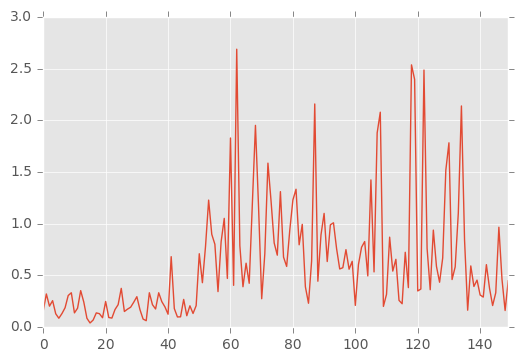

In [48]:
odds_hat_Versicolor.plot()

In [49]:
p_hat_Versicolor = odds_hat_Versicolor / (1 + odds_hat_Versicolor)

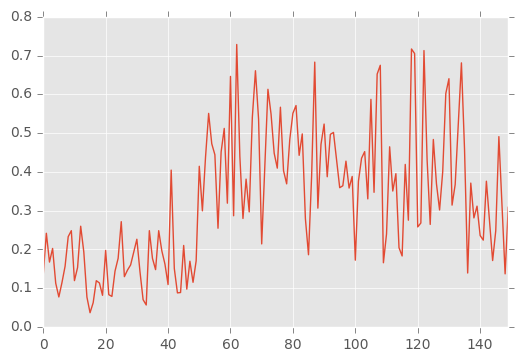

In [50]:
p_hat_Versicolor.plot()

In [51]:
c_hat_Versicolor = p_hat_Versicolor.round()

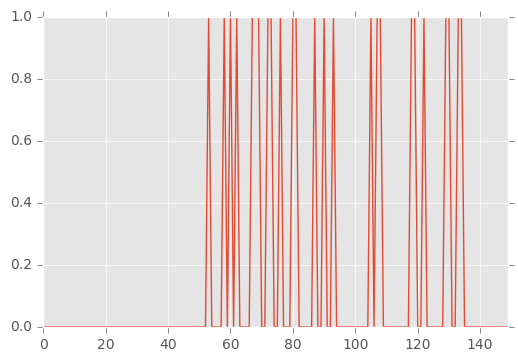

In [52]:
c_hat_Versicolor.plot()

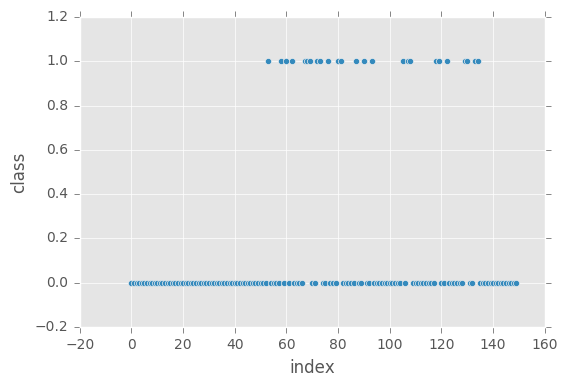

In [53]:
pd.DataFrame({'class': c_hat_Versicolor, 'index': c_hat_Versicolor.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

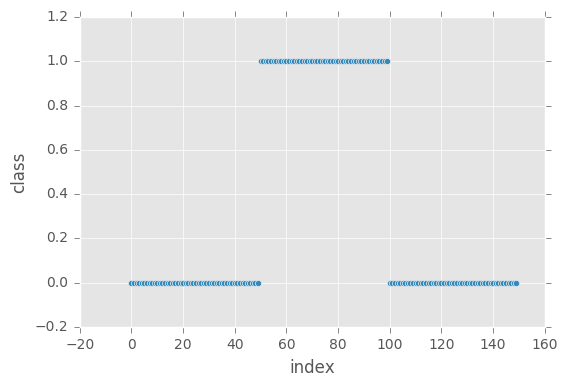

In [54]:
pd.DataFrame({'class': cs.Versicolor, 'index': cs.Versicolor.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [55]:
(c_hat_Versicolor == cs.Versicolor).sum()

105

In [56]:
(c_hat_Versicolor != cs.Versicolor).sum()

45

In [58]:
pd.crosstab(c_hat_Versicolor,
    cs.Versicolor,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

# accuracy is # correct over total, error is # wrong / total

True Class,0.0,1.0
Hypothesized Class,,
0.0,90,35
1.0,10,15


## Virginica

In [59]:
model_Virginica = linear_model.LogisticRegression().\
    fit(X, cs.Virginica)

In [60]:
model_Virginica.score(X, cs.Virginica)

0.97999999999999998

In [61]:
logit_hat_Virginica = model_Virginica.intercept_ + \
    (X * model_Virginica.coef_[0]).sum(axis = 1)

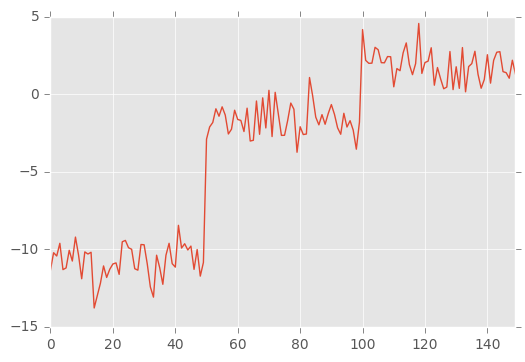

In [62]:
logit_hat_Virginica.plot()

In [63]:
((logit_hat_Virginica >= 0) == (cs.Virginica == 1)).mean()

0.97999999999999998

In [64]:
((logit_hat_Virginica >= 0) == (cs.Virginica == 1)).sum()

147

In [65]:
((logit_hat_Virginica >= 0) != (cs.Virginica == 1)).sum()

3

In [66]:
odds_hat_Virginica = np.exp(logit_hat_Virginica)

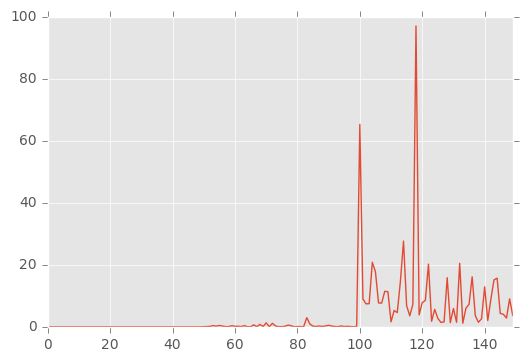

In [67]:
odds_hat_Virginica.plot()

In [68]:
p_hat_Virginica = odds_hat_Virginica / (1 + odds_hat_Virginica)

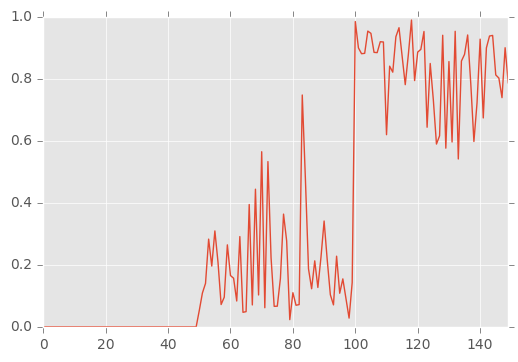

In [69]:
p_hat_Virginica.plot()

In [70]:
c_hat_Virginica = p_hat_Virginica.round()

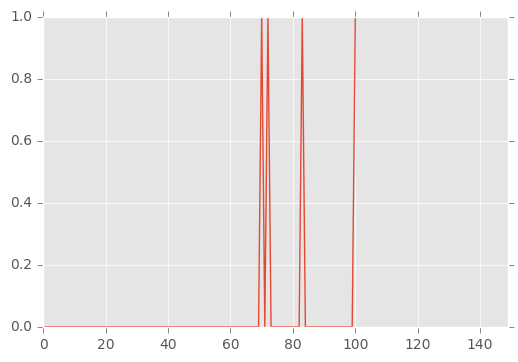

In [71]:
c_hat_Virginica.plot()

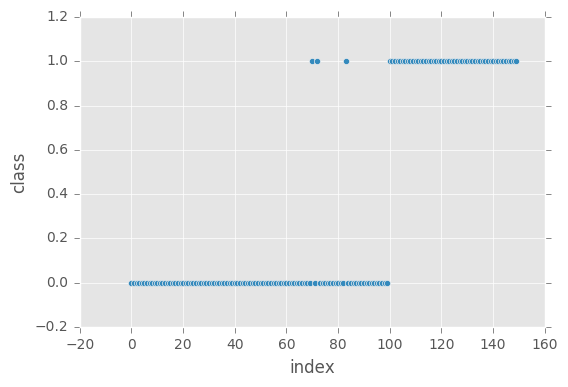

In [72]:
pd.DataFrame({'class': c_hat_Virginica, 'index': c_hat_Virginica.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

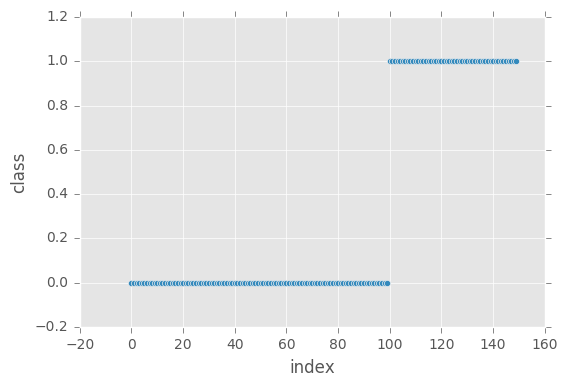

In [73]:
pd.DataFrame({'class': cs.Virginica, 'index': cs.Virginica.index}).\
    plot(kind = 'scatter', x = 'index', y = 'class')

In [74]:
(c_hat_Virginica == cs.Virginica).sum()

147

In [75]:
(c_hat_Virginica != cs.Virginica).sum()

3

In [76]:
pd.crosstab(c_hat_Virginica,
    cs.Virginica,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,0.0,1.0
Hypothesized Class,,
0.0,97,0
1.0,3,50


## Activity | Let's combine the models together!

In [77]:
hats = pd.DataFrame({'Setosa': c_hat_Setosa,
    'Versicolor': c_hat_Versicolor,
    'Virginica': c_hat_Virginica})

In [78]:
hats.sum()

Setosa        50.0
Versicolor    25.0
Virginica     53.0
dtype: float64

In [79]:
hats.sum().sum()

128.0

In [80]:
hats.sum(axis = 1).value_counts()

1.0    106
0.0     33
2.0     11
dtype: int64

In [81]:
pd.crosstab(hats.Setosa, [hats.Versicolor, hats.Virginica])

Versicolor 0.0     1.0    
Virginica  0.0 1.0 0.0 1.0
Setosa                    
0.0         33  42  14  11
1.0         50   0   0   0

In [82]:
hats = pd.DataFrame({'p_Setosa': p_hat_Setosa,
    'p_Versicolor': p_hat_Versicolor,
    'p_Virginica': p_hat_Virginica})

hats['p'] = hats.max(axis = 1)

hats['c'] = 'Setosa'
hats.loc[hats.p_Versicolor == hats.p, 'c'] = 'Versicolor'
hats.loc[hats.p_Virginica == hats.p, 'c'] = 'Virginica'

In [83]:
hats

,p_Setosa,p_Versicolor,p_Virginica,p,c
0,0.984074,0.134585,0.000012,0.984074,Setosa
1,0.964775,0.241600,0.000037,0.964775,Setosa
2,0.976924,0.167258,0.000030,0.976924,Setosa
3,0.957121,0.202420,0.000067,0.957121,Setosa
4,0.985634,0.112769,0.000012,0.985634,Setosa
...,...,...,...,...,...
145,0.001229,0.248149,0.812828,0.812828,Virginica
146,0.001190,0.490985,0.802547,0.802547,Virginica
147,0.001540,0.315145,0.739502,0.739502,Virginica
148,0.001140,0.136859,0.900496,0.900496,Virginica


In [84]:
(hats.c == c).mean()

0.95999999999999996

In [85]:
(hats.c == c).sum()

144

In [86]:
(hats.c != c).sum()

6

In [87]:
pd.crosstab(
    hats.c,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,45,1
Virginica,0,5,49


## Multiclass Logistic Regression

In [88]:
# don't try this with stat model. it can only run binary regression, and it creates a report
X = df[ ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] ]
c = df.Species

model = linear_model.LogisticRegression().\
    fit(X, c)

In [89]:
model.score(X, c)

0.95999999999999996

In [90]:
c_hat = model.predict(X)

pd.crosstab(c_hat,
    c,
    rownames = ['Hypothesized Class'],
    colnames = ['True Class'])

True Class,Setosa,Versicolor,Virginica
Hypothesized Class,,,
Setosa,50,0,0
Versicolor,0,45,1
Virginica,0,5,49
